<a href="https://colab.research.google.com/github/marilynle/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module2-sampling-confidence-intervals-and-hypothesis-testing/Marilyn_Landim_Esko_LS_DSPT3_132_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy


In [2]:
# Loading the data
  !wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
    

--2019-10-05 02:20:44--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.06s   

2019-10-05 02:20:45 (285 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [3]:
# Adding a header row and cleaning the data
df = pd.read_csv('house-votes-84.data',
               header=None,
               names=['class_name','handicapped_infants','water_project',
                        'budget_resolution','physician_fee_freeze', 'el_salvador_aid',
                        'religious_groups_in_schools','anti_satellite_test_ban',
                        'aid_to_nicaraguan_contras','mx_missile','immigration',
                        'synfuels_corporation_cutback', 'education_spending', 'superfund_right_to_sue','crime','duty_free_exports',
                        'export_administration_act_south_africa'])
df = df.replace({'?':float(0),'n':float(0),'y':float(1)})
df.sample(10)


,class_name,handicapped_infants,water_project,budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa
26,democrat,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
409,republican,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
320,democrat,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
260,democrat,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
379,republican,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
332,democrat,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
156,republican,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
345,republican,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
231,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
116,democrat,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


In [4]:
df.describe()


,handicapped_infants,water_project,budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,0.429885,0.448276,0.581609,0.406897,0.487356,0.625287,0.549425,0.556322,0.475862,0.496552,0.344828,0.393103,0.480460,0.570115,0.400000,0.618391
std,0.495630,0.497890,0.493863,0.491821,0.500416,0.484606,0.498124,0.497390,0.499992,0.500564,0.475859,0.489002,0.500193,0.495630,0.490462,0.486341
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
# Confidence Intervals:
#1 Generate and numerically represent a confidence interval

In [0]:
# The samples
df_democrat = df[df['class_name'] == 'democrat']
df_republican = df[df['class_name'] == 'republican']


In [7]:
df_democrat.shape


(267, 17)

In [8]:
df_republican.shape


(168, 17)

In [0]:
issues =['handicapped_infants','water_project',
                        'budget_resolution','physician_fee_freeze', 'el_salvador_aid',
                        'religious_groups_in_schools','anti_satellite_test_ban',
                        'aid_to_nicaraguan_contras','mx_missile','immigration',
                        'synfuels_corporation_cutback', 'education_spending', 'superfund_right_to_sue','crime','duty_free_exports',
                        'export_administration_act_south_africa']


In [0]:
from scipy.stats import sem, t
from numpy import mean

def confidence_interval(x,ci): # ci = 0.95
  
  M = np.mean(x)
  ME = sem(x)* t.ppf((1 + ci) / 2, len(x) - 1)
  
  ci_endpoints = {   
      
          'The lower endpoint of the 95% CI is:': M - ME,
          'The upper endpoint of the 95% CI is:': M + ME 
  }
  return ci_endpoints 
      

In [11]:
# Democrats
for issue in issues: # calling the function for each issue  
    print("") 
    print(issue)
    print(confidence_interval(df_democrat[issue],0.95))
    


handicapped_infants
{'The lower endpoint of the 95% CI is:': 0.5247719472369563, 'The upper endpoint of the 95% CI is:': 0.6437673786057403}

water_project
{'The lower endpoint of the 95% CI is:': 0.3893864348338393, 'The upper endpoint of the 95% CI is:': 0.5094899696605427}

budget_resolution
{'The lower endpoint of the 95% CI is:': 0.8239366017405851, 'The upper endpoint of the 95% CI is:': 0.9064004769111003}

physician_fee_freeze
{'The lower endpoint of the 95% CI is:': 0.025525257217451757, 'The upper endpoint of the 95% CI is:': 0.07934365664022615}

el_salvador_aid
{'The lower endpoint of the 95% CI is:': 0.1571693613158776, 'The upper endpoint of the 95% CI is:': 0.25481565741071416}

religious_groups_in_schools
{'The lower endpoint of the 95% CI is:': 0.40049996006382055, 'The upper endpoint of the 95% CI is:': 0.5208483545429211}

anti_satellite_test_ban
{'The lower endpoint of the 95% CI is:': 0.6967242507786483, 'The upper endpoint of the 95% CI is:': 0.8014030900453218}


In [12]:
# Republicans
for issue in issues: # calling the function for each issue  
    print("") 
    print(issue)
    print(confidence_interval(df_republican[issue],0.95))
    
    


handicapped_infants
{'The lower endpoint of the 95% CI is:': 0.12526125471665267, 'The upper endpoint of the 95% CI is:': 0.2437863643309664}

water_project
{'The lower endpoint of the 95% CI is:': 0.37048144515554093, 'The upper endpoint of the 95% CI is:': 0.522375697701602}

budget_resolution
{'The lower endpoint of the 95% CI is:': 0.07941444662385228, 'The upper endpoint of the 95% CI is:': 0.18249031528090964}

physician_fee_freeze
{'The lower endpoint of the 95% CI is:': 0.9442772968863529, 'The upper endpoint of the 95% CI is:': 0.9961988935898376}

el_salvador_aid
{'The lower endpoint of the 95% CI is:': 0.8967330684696345, 'The upper endpoint of the 95% CI is:': 0.9723145505779845}

religious_groups_in_schools
{'The lower endpoint of the 95% CI is:': 0.8385199369558394, 'The upper endpoint of the 95% CI is:': 0.9352895868536844}

anti_satellite_test_ban
{'The lower endpoint of the 95% CI is:': 0.16764186452309232, 'The upper endpoint of the 95% CI is:': 0.296643849762622}

a

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


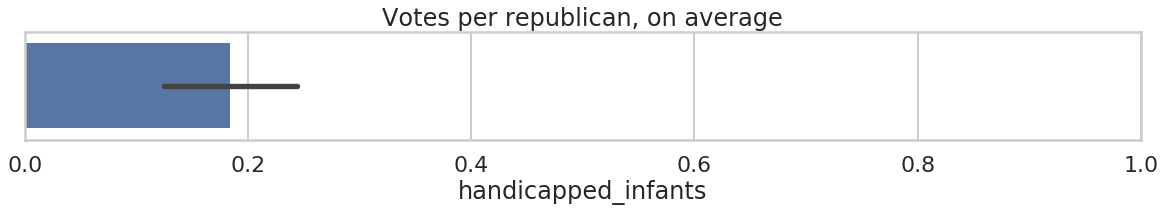

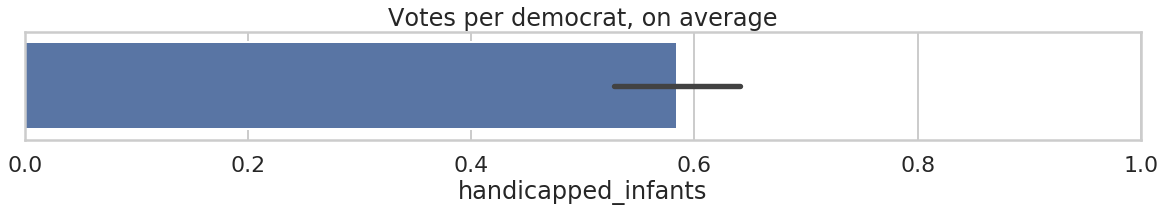

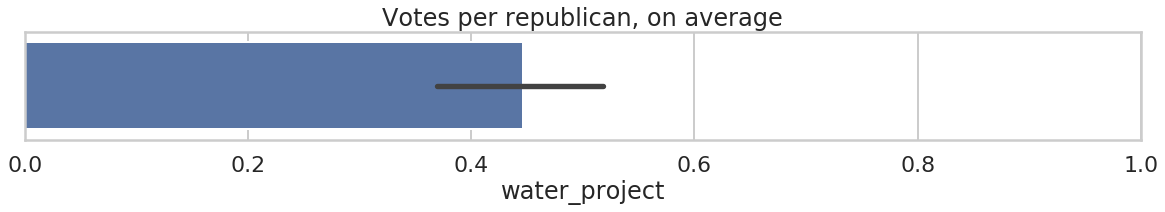

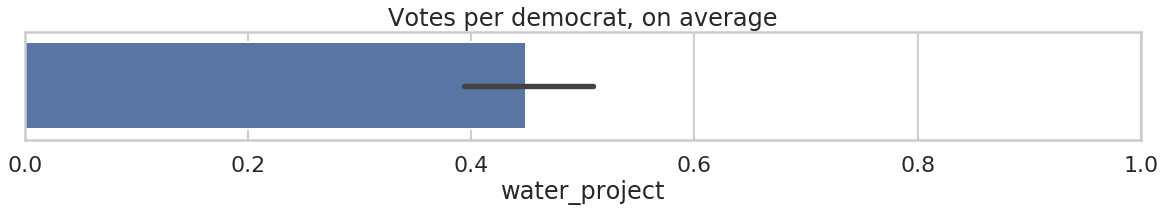

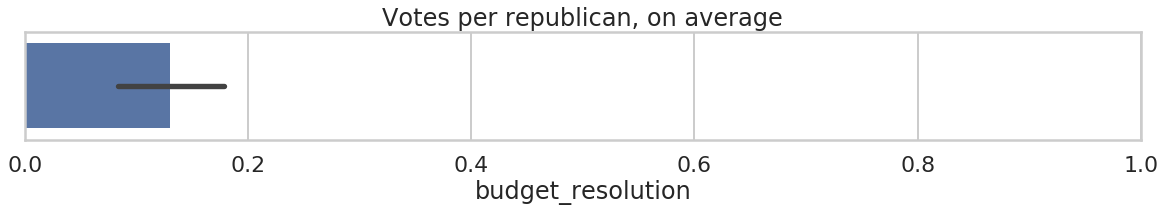

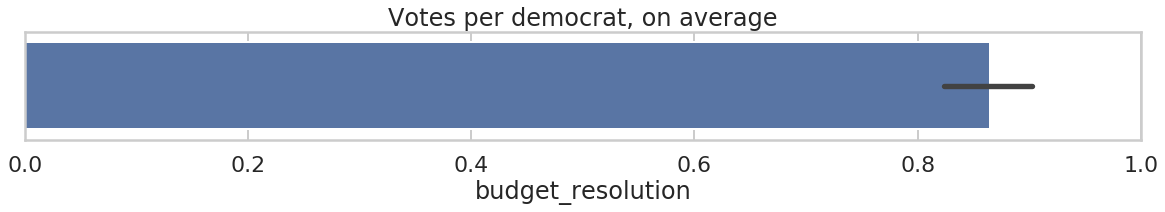

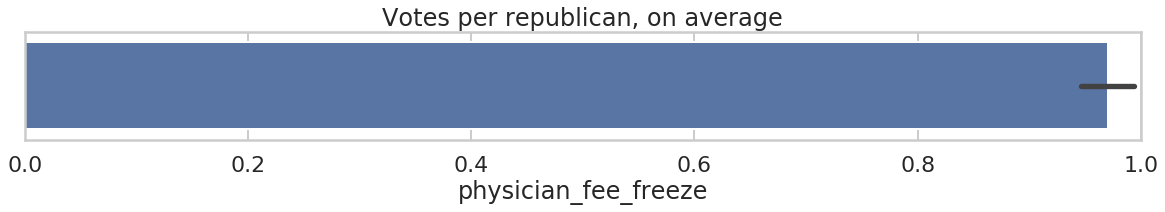

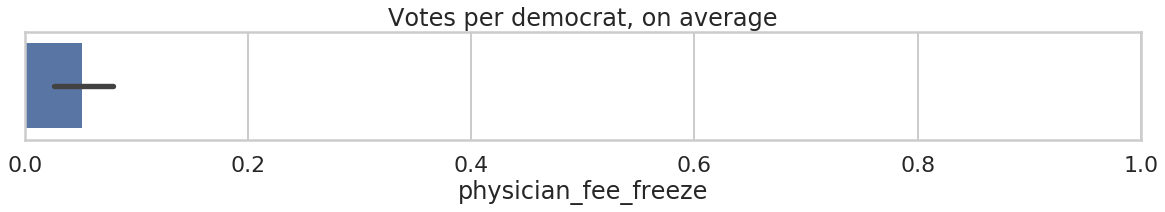

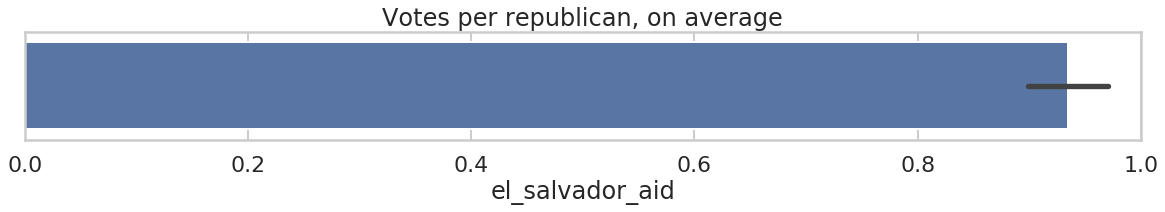

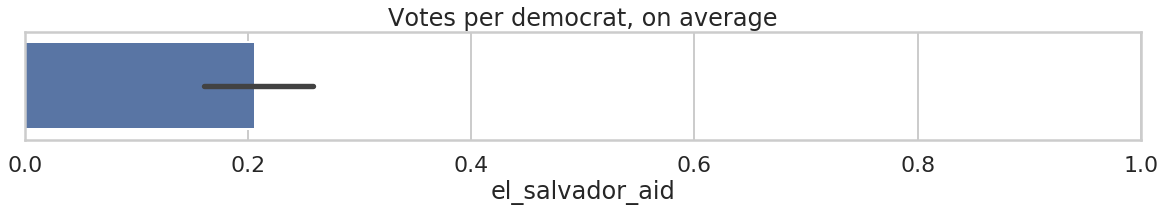

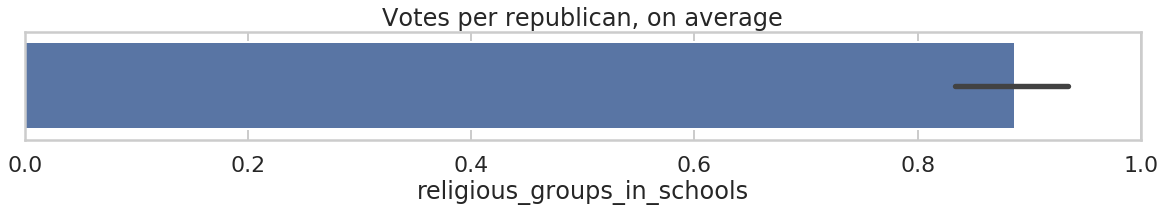

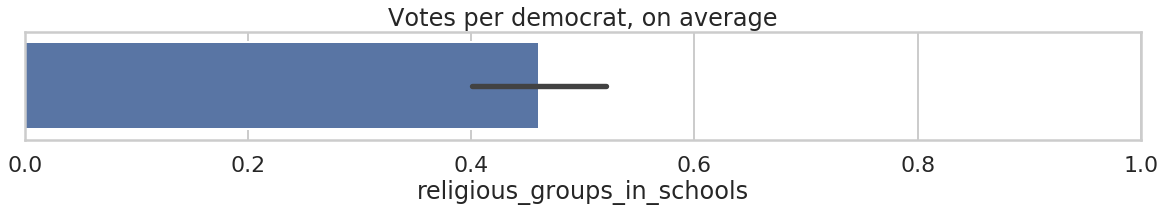

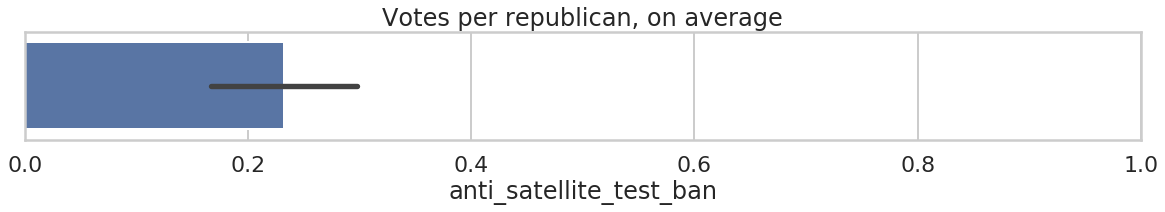

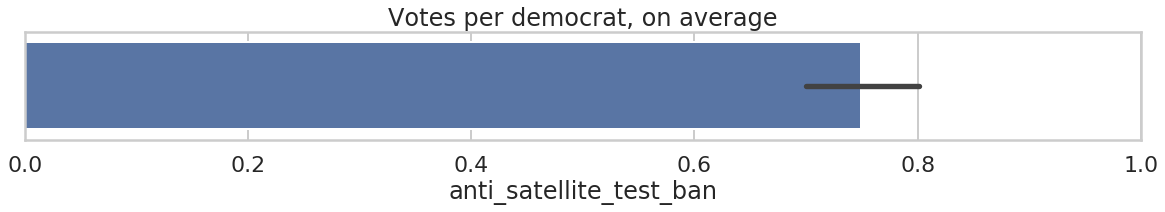

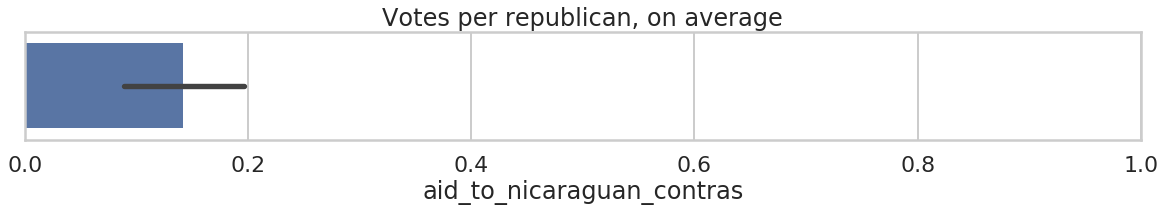

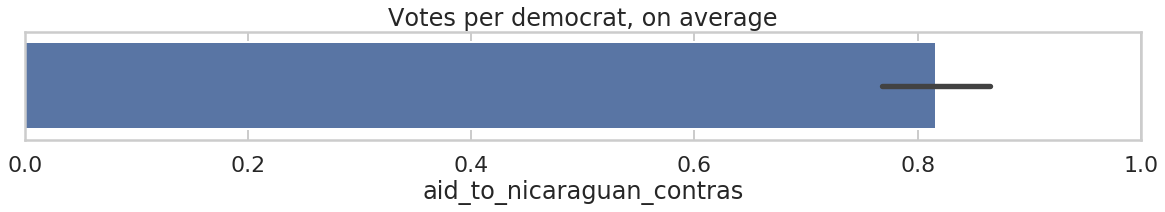

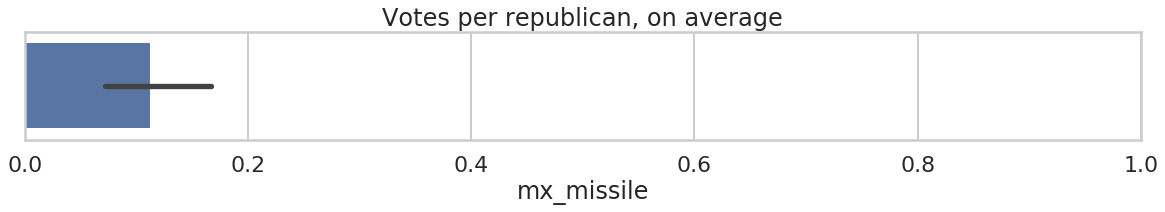

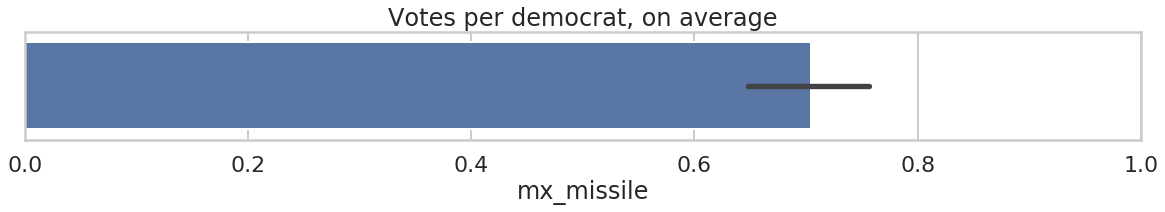

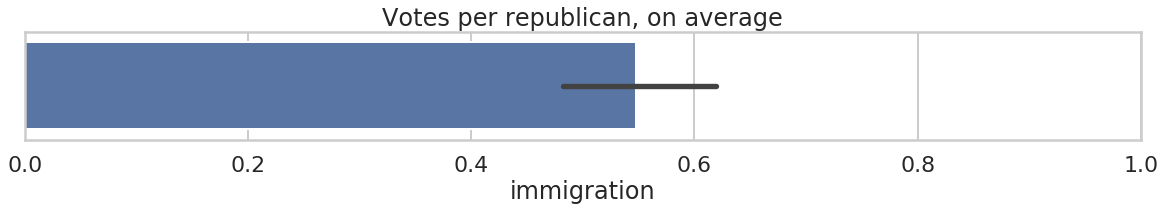

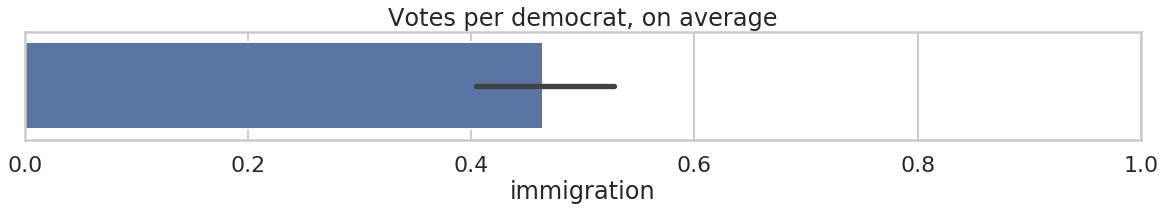

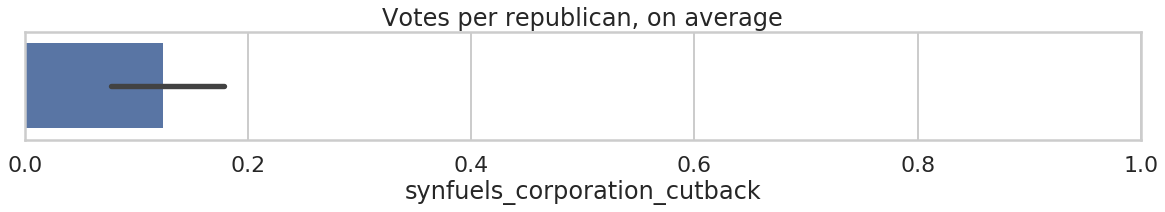

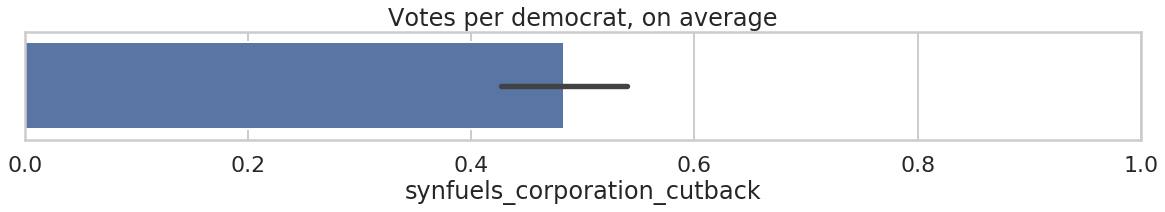

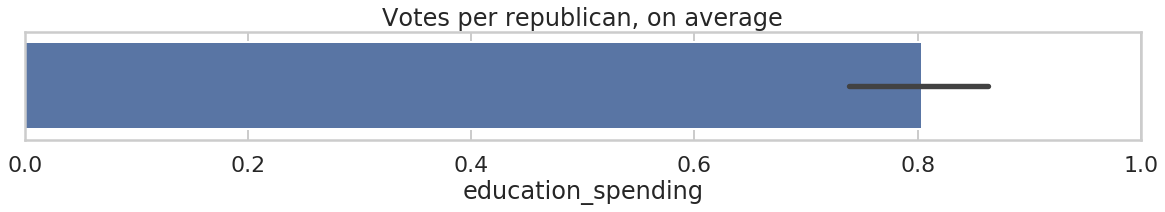

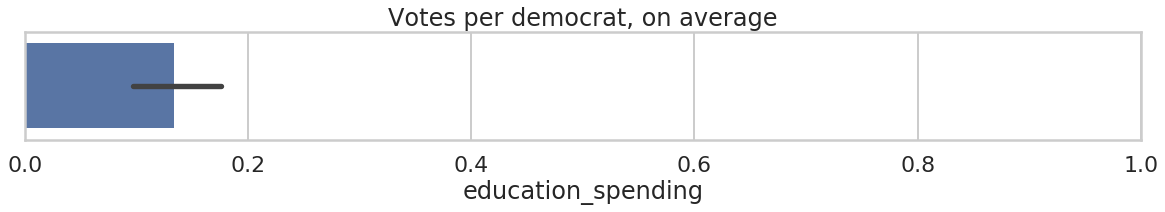

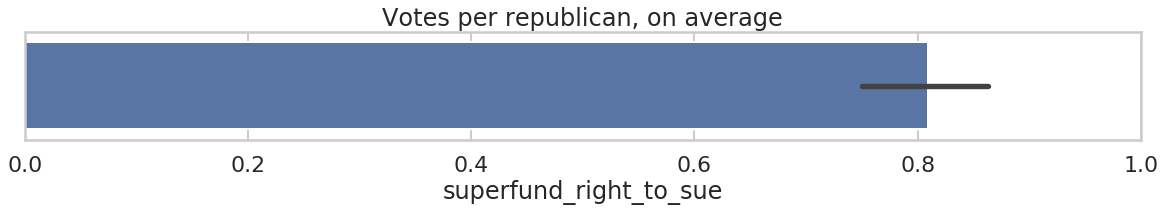

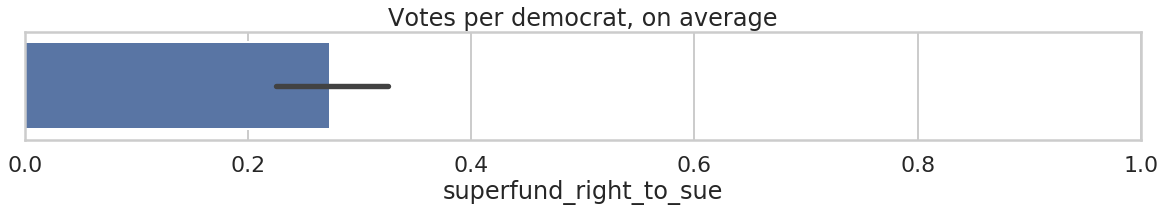

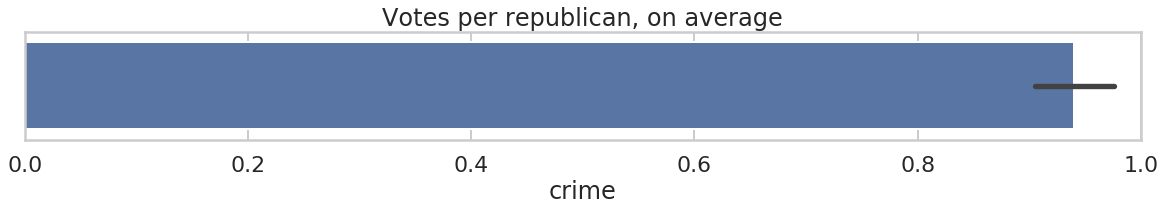

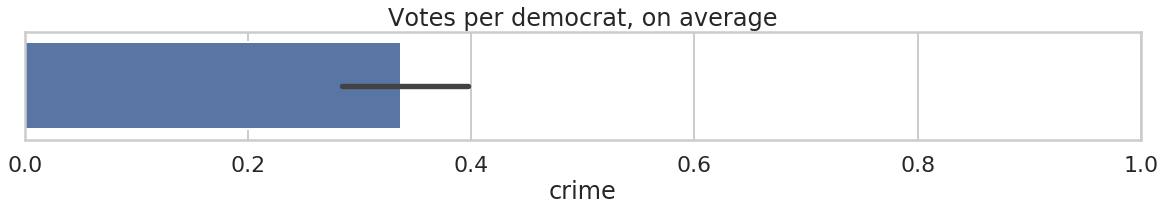

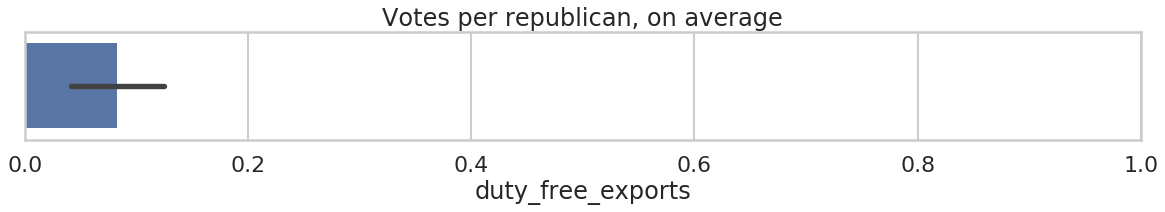

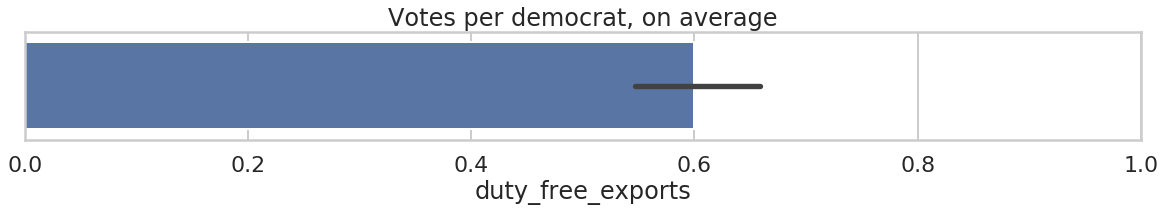

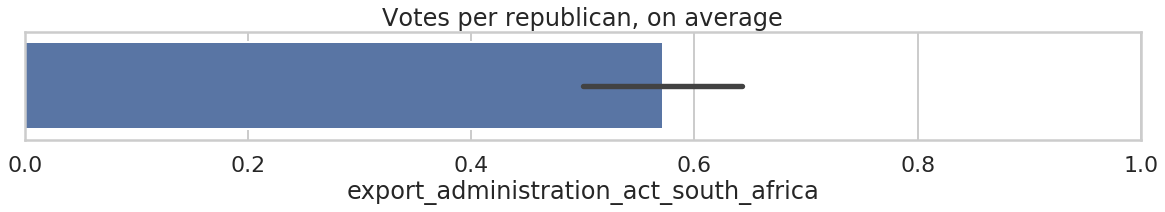

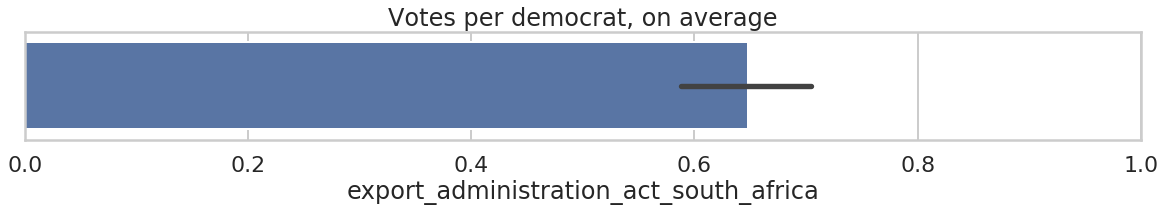

In [13]:
# Confidence Intervals:
#2 Graphically (with a plot) represent the confidence interval

for issue in issues: # calling the function for each issue  

    sns.set(style="whitegrid")
    sns.set_context('poster')
    plt.figure(figsize=(20, 2))
    plt.xlim(0, 1)
    plt.title('Votes per republican, on average')
    sns.barplot(df_republican[issue], ci=95)

    plt.figure(figsize=(20, 2))
    plt.xlim(0, 1)
    plt.title('Votes per democrat, on average')
    sns.barplot(df_democrat[issue], ci=95);


In [0]:
# Confidence Intervals:
#3 Interpret the confidence interval - what does it tell you about the data and its distribution?

In [0]:
# Chi-squared tests:
#4 Take a dataset that we have used in the past in class that has categorical variables. 
# Pick two of those categorical variables and run a chi-squared tests on that data
# By hand using Numpy
# In a single line using Scipy

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)